In [ ]:
!pip install pandas numpy matplotlib plotly ipyd3


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 12.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
!pip install kaggle

In [ ]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json into the .kaggle directory
!cp kaggle.json ~/.kaggle/


In [ ]:
# Set permissions for kaggle.json to ensure it is secure
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Use Kaggle API to download the dataset
!kaggle competitions download -c airbnb-recruiting-new-user-bookings


 97% 63.0M/64.7M [00:01<00:00, 70.5MB/s]
100% 64.7M/64.7M [00:01<00:00, 62.9MB/s]


In [ ]:
# Unzip the downloaded file
!unzip airbnb-recruiting-new-user-bookings.zip
!unzip train_users_2.csv.zip
!unzip sessions.csv.zip
!unzip countries.csv.zip
!unzip age_gender_bkts.csv.zip
!unzip sample_submission_NDF.csv.zip
!unzip test_users.csv.zip


Archive:  airbnb-recruiting-new-user-bookings.zip
replace age_gender_bkts.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: age_gender_bkts.csv.zip  
replace countries.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: countries.csv.zip       
replace sample_submission_NDF.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission_NDF.csv.zip  
replace sessions.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sessions.csv.zip        
replace test_users.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_users.csv.zip      
replace train_users_2.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_users_2.csv.zip   
Archive:  train_users_2.csv.zip
  inflating: train_users_2.csv       
Archive:  sessions.csv.zip
  inflating: sessions.csv            
Archive:  countries.csv.zip
  inflating: countries.csv           
Archive:  age_gender_bkts.csv.zip
  inflating: age_gender_bkts.csv     
Archive:  sample_

In [ ]:
import pandas as pd

# Load the main dataset (example for train_users_2.csv)
df = pd.read_csv('train_users_2.csv')

df.info()
# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
# Check for missing values
df.isnull().sum()

# Impute missing ages with the median
df['age'] = df['age'].fillna(df['age'].median())

# Drop rows with missing first booking dates
df.dropna(subset=['date_first_booking'], inplace=True)

# Convert date columns to datetime format
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

# Drop columns that are not needed or have too many missing values (if any)
df = df.drop(columns=['date_first_booking'], axis=1)

# Summary statistics
df.describe()


,date_account_created,timestamp_first_active,age,signup_flow
count,88908,88908,88908.000000,88908.000000
mean,2013-05-21 09:02:26.254555136,2013-05-21 13:52:35.234129664,44.693290,2.418669
min,2010-01-01 00:00:00,2009-06-09 23:12:47,2.000000,0.000000
25%,2012-10-18 00:00:00,2012-10-17 23:12:51,30.000000,0.000000
50%,2013-08-07 00:00:00,2013-08-07 05:39:43,34.000000,0.000000
75%,2014-02-22 00:00:00,2014-02-22 01:35:47.249999872,38.000000,0.000000
max,2014-06-30 00:00:00,2014-06-30 23:55:47,2014.000000,25.000000
std,NaN,NaN,128.352416,6.473385


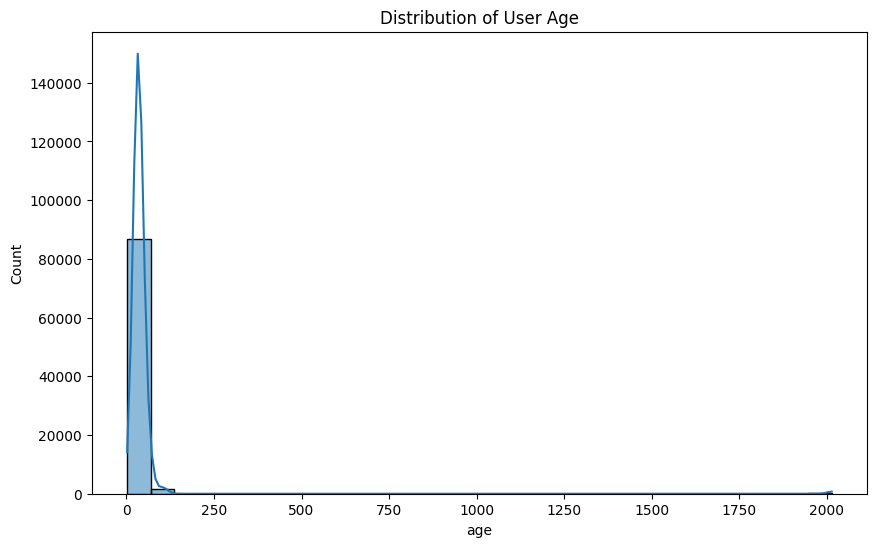

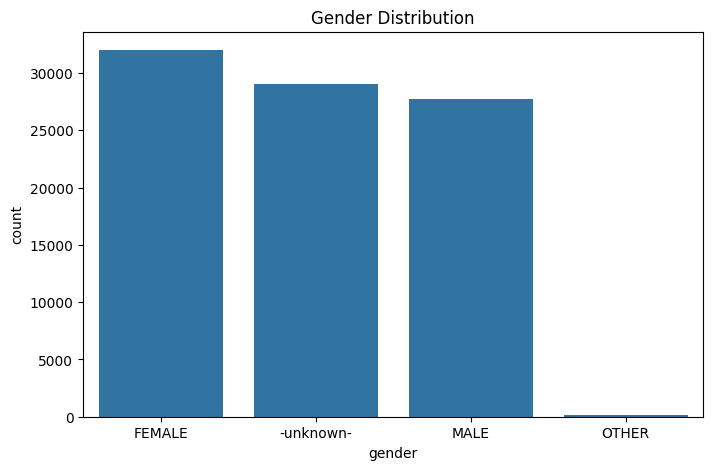

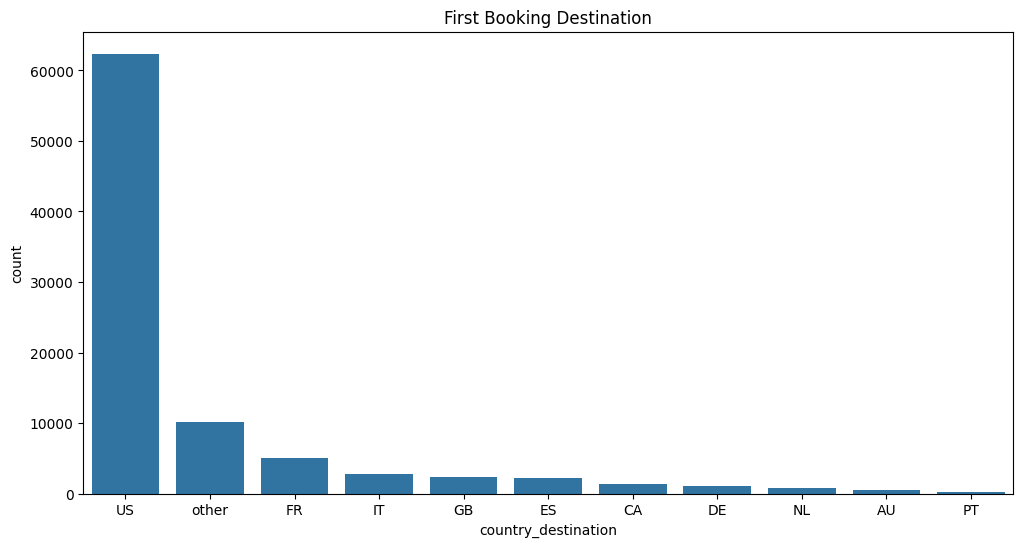

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of User Age')
plt.show()

# Countplot of Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

# Countplot of First Booking Destination
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country_destination', order=df['country_destination'].value_counts().index)
plt.title('First Booking Destination')
plt.show()


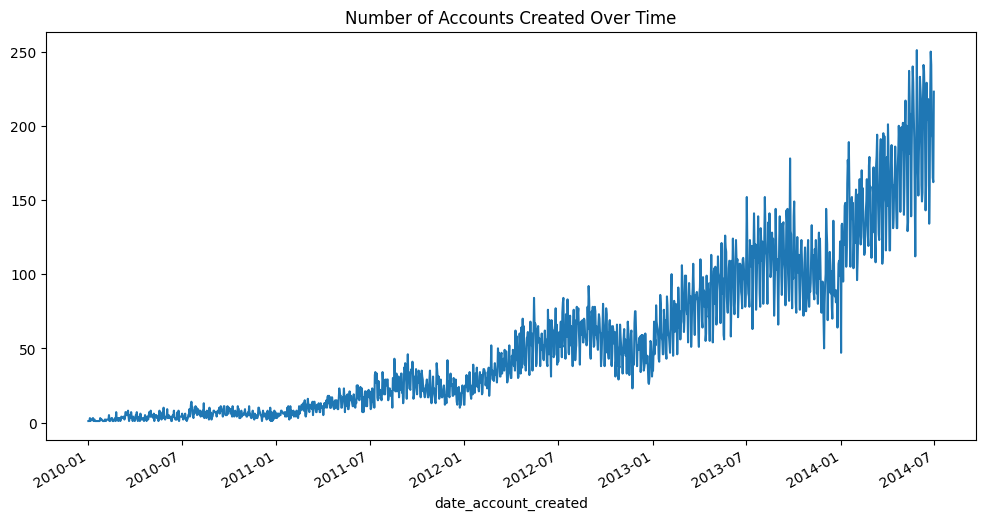

In [ ]:
# Convert to datetime for plotting
df['date_account_created'] = pd.to_datetime(df['date_account_created'])

# Plot sign-ups over time
plt.figure(figsize=(12, 6))
df['date_account_created'].value_counts().sort_index().plot()
plt.title('Number of Accounts Created Over Time')
plt.show()


In [ ]:
import pandas as pd

# Example dataframe, replace with your actual dataframe
data = {'country_destination': ['US', 'FR', 'CA', 'GB', 'US', 'CA', 'GB', 'US', 'FR', 'GB']}
df = pd.DataFrame(data)

# Count occurrences of each destination
destination_counts = df['country_destination'].value_counts().reset_index()
destination_counts.columns = ['destination', 'count']

# Convert the data to a dictionary format for D3.js
destination_data = destination_counts.to_dict(orient='records')

# Print the formatted data (optional)
print(destination_data)


[{'destination': 'US', 'count': 3}, {'destination': 'GB', 'count': 3}, {'destination': 'FR', 'count': 2}, {'destination': 'CA', 'count': 2}]


In [ ]:
from IPython.display import display, HTML

# D3.js HTML template
html_template = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>

.bar {{
  fill: steelblue;
}}

.bar:hover {{
  fill: orange;
}}

.axis-label {{
  font-size: 12px;
}}

</style>
<body>
<div id="chart"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data to be visualized
var data = {data};

// Set dimensions for the chart
var width = 500, height = 300, margin = 40;

// Create SVG container
var svg = d3.select("#chart").append("svg")
  .attr("width", width + margin * 2)
  .attr("height", height + margin * 2)
  .append("g")
  .attr("transform", "translate(" + margin + "," + margin + ")");

// X scale
var x = d3.scaleBand()
  .domain(data.map(function(d) {{ return d.destination; }}))
  .range([0, width])
  .padding(0.1);

// Y scale
var y = d3.scaleLinear()
  .domain([0, d3.max(data, function(d) {{ return d.count; }})])
  .range([height, 0]);

// Create bars
svg.selectAll(".bar")
  .data(data)
  .enter().append("rect")
  .attr("class", "bar")
  .attr("x", function(d) {{ return x(d.destination); }})
  .attr("y", function(d) {{ return y(d.count); }})
  .attr("width", x.bandwidth())
  .attr("height", function(d) {{ return height - y(d.count); }});

// Add x-axis
svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x))
  .selectAll("text")
  .style("text-anchor", "end")
  .attr("dx", "-0.8em")
  .attr("dy", "-0.15em")
  .attr("transform", "rotate(-65)");

// Add y-axis
svg.append("g")
  .call(d3.axisLeft(y));

// Add labels
svg.append("text")
  .attr("x", width / 2)
  .attr("y", height + margin)
  .attr("text-anchor", "middle")
  .attr("class", "axis-label")
  .text("Destination");

svg.append("text")
  .attr("x", -height / 2)
  .attr("y", -margin + 15)
  .attr("transform", "rotate(-90)")
  .attr("text-anchor", "middle")
  .attr("class", "axis-label")
  .text("Count");

</script>
</body>
'''

# Format the template with the dynamically generated data
html_code = html_template.format(data=destination_data)

# Display the HTML directly in the notebook
display(HTML(html_code))


In [ ]:
# Simulate some data for demonstration purposes
import numpy as np

np.random.seed(0)
data = {
    'age': np.random.randint(18, 70, 100),
    'signup_days': np.random.randint(1, 365, 100)
}
df_scatter = pd.DataFrame(data)

# Convert the data into a D3-friendly format
scatter_data = df_scatter.to_dict(orient='records')


In [ ]:
from IPython.display import display, HTML

html_scatter_template_with_bg = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>
  .bar {{
    fill: steelblue;
  }}

  .bar:hover {{
    fill: orange;
  }}

  .axis-label {{
    font-size: 12px;
  }}

  .selected {{
    fill: orange;
  }}
</style>
<body>
<div id="scatter_plot"></div>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data to be visualized
var data = {data};

// Set dimensions for the chart
var width = 500, height = 300, margin = 40;

// Create SVG container
var svg = d3.select("#scatter_plot").append("svg")
  .attr("width", width + margin * 2)
  .attr("height", height + margin * 2)
  .append("g")
  .attr("transform", "translate(" + margin + "," + margin + ")");

// Add a white background rectangle
svg.append("rect")
  .attr("width", width)
  .attr("height", height)
  .attr("fill", "white");

// Set the scales
var x = d3.scaleLinear()
  .domain([0, d3.max(data, function(d) {{ return d.signup_days; }})])
  .range([0, width]);

var y = d3.scaleLinear()
  .domain([0, d3.max(data, function(d) {{ return d.age; }})])
  .range([height, 0]);

// Create circles for each point
svg.selectAll(".dot")
  .data(data)
  .enter().append("circle")
  .attr("class", "dot")
  .attr("cx", function(d) {{ return x(d.signup_days); }})
  .attr("cy", function(d) {{ return y(d.age); }})
  .attr("r", 3)
  .style("fill", "steelblue");

// Add X axis
svg.append("g")
  .attr("transform", "translate(0," + height + ")")
  .call(d3.axisBottom(x));

// Add Y axis
svg.append("g")
  .call(d3.axisLeft(y));

// Brush functionality
var brush = d3.brush()
  .extent([[0, 0], [width, height]])
  .on("brush", brushed)
  .on("end", brushended);

svg.append("g")
  .call(brush);

function brushed() {{
  var selection = d3.event.selection;
  svg.selectAll(".dot")
    .classed("selected", function(d) {{
      return selection[0][0] <= x(d.signup_days) && x(d.signup_days) <= selection[1][0]
          && selection[0][1] <= y(d.age) && y(d.age) <= selection[1][1];
    }});
}}

function brushended() {{
  if (!d3.event.selection) {{
    svg.selectAll(".dot").classed("selected", false);
  }}
}}

</script>
</body>
'''

# Replace data into the HTML template
html_scatter_code_with_bg = html_scatter_template_with_bg.format(data=scatter_data)

# Display the HTML directly in the notebook
display(HTML(html_scatter_code_with_bg))


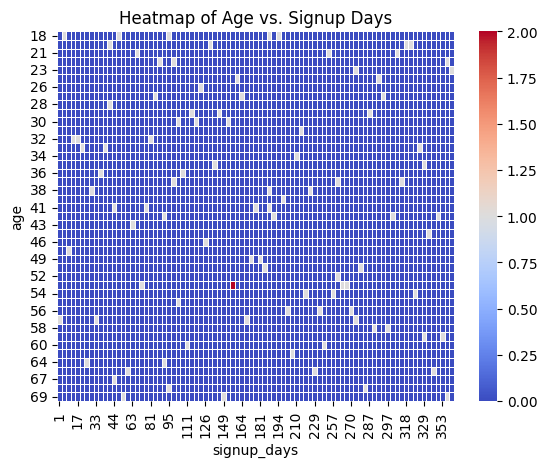

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of age vs. signup_days
heatmap_data = pd.crosstab(df_scatter['age'], df_scatter['signup_days'])

# Display using seaborn for now, we will switch this to d3.js
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Age vs. Signup Days')
plt.show()
